In [ ]:
import datetime
now = datetime.datetime.now()
print(now, type(now))
#datetime.date.year()

2022-11-30 11:46:33.452823 <class 'datetime.datetime'>


In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
28 * 28 +1
785 * 128 + (128 + 1) * 10

101770

In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


# 　　**Training , Validation to dataset**

In [ ]:
# Training , Validation 사진 목록

import os
from tqdm.notebook import tqdm

dataset1 = {}
dataset2 = {}

Training_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/pig qc/Training'
Validation_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/pig qc/Validation'

pigclass1 = os.listdir(Training_path)   # 등급별 목록
pigclass2 = os.listdir(Validation_path)   # 등급별 목록

for label1 , label2 in tqdm(zip(pigclass1 , pigclass2)):
    print(label1, label2)

    subpath1 = Training_path + '/' + label1 + '/'
    subpath2 = Validation_path + '/' + label2 + '/'
    images1 = os.listdir(subpath1)   # 등급별 이미지 목록
    images2 = os.listdir(subpath2)   # 등급별 이미지 목록
    dataset1[label1] = []
    dataset2[label2] = []

    for imagefile1 , imagefile2 in tqdm(zip(images1 , images2)):   # 등급별 사진 하나씩 불러오기
    
        dataset1[label1].append(subpath1 + imagefile1)
        dataset2[label2].append(subpath2 + imagefile2)
        #break


print(os.listdir(Training_path))
print(os.listdir(Validation_path))
# 등급별 개수
print(len(dataset1['class1+']), len(dataset1['class1']), len(dataset1['class2']))
print(len(dataset2['class1+']), len(dataset2['class1']), len(dataset2['class2']))

0it [00:00, ?it/s]

class1 .ipynb_checkpoints


0it [00:00, ?it/s]

.ipynb_checkpoints class1


0it [00:00, ?it/s]

class1+ class1+


0it [00:00, ?it/s]

class2 class2


0it [00:00, ?it/s]

['class1', '.ipynb_checkpoints', 'class1+', 'class2']
['.ipynb_checkpoints', 'class1', 'class1+', 'class2']
376 0 309
376 0 309


[]

In [ ]:
#  사진 목록

import os
from tqdm.notebook import tqdm

dataset = {}

#pigdata_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/pig qc/Validation'
pigdata_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/pig qc/Training'
pigclass = os.listdir(pigdata_path)   # 등급별 목록

for label in tqdm(pigclass):
    subpath = pigdata_path + '/' + label + '/'
    images = os.listdir(subpath)   # 등급별 이미지 목록
    dataset[label] = []

    for imagefile in tqdm(images):   # 등급별 사진 하나씩 불러오기
        dataset[label].append(subpath + imagefile)
        #break

# for a,b in dataset.items():
#     print(a,b, end = '\n')
#     break

# 등급별 개수
print(os.listdir(pigdata_path))
print(len(dataset['class1+']), len(dataset['class1']), len(dataset['class2']))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3036 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/3009 [00:00<?, ?it/s]

  0%|          | 0/2476 [00:00<?, ?it/s]

['class1', '.ipynb_checkpoints', 'class1+', 'class2']
3009 3036 2476


In [ ]:
import matplotlib.cm as cm

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

아래 경로 짜는거 직접해보기


In [ ]:
os.listdir(folder_path)[::2]

['pighigh', 'piglow']

In [ ]:
'''
# 2 번째 시도

folder_path = '/content/pigclass'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path)[::2]:   # 카테고리를 경로에 붙여 카테고리 키에 파일경로 넣기
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

dataset 딕셔너리 
- 키 : 라벨 
- 밸류 : 이미지 경로들

In [ ]:
'''image_size = []

for i in dataset['pig']:
    img = cv2.imread(i)
    image_size.append(img.shape)

image_size[:10] '''
  
# 돼지고기 사진의 가로가 3024 로 통일인것을 알수있음

[(495, 3024, 3),
 (303, 3024, 3),
 (360, 3024, 3),
 (270, 3024, 3),
 (462, 3024, 3),
 (522, 3024, 3),
 (342, 3024, 3),
 (363, 3024, 3),
 (318, 3024, 3),
 (264, 3024, 3)]

In [ ]:
dataset.items()

# 　　**New Directory**

In [ ]:
!mkdir resized
!mkdir resized/train
!mkdir resized/train/class1+
!mkdir resized/train/class1
!mkdir resized/train/class2

!mkdir resized/test
!mkdir resized/test/class1+
!mkdir resized/test/class1
!mkdir resized/test/class2

mkdir: cannot create directory ‘resized’: File exists
mkdir: cannot create directory ‘resized/train’: File exists
mkdir: cannot create directory ‘resized/train/class1+’: File exists
mkdir: cannot create directory ‘resized/train/class1’: File exists
mkdir: cannot create directory ‘resized/train/class2’: File exists


## 　　Resize with padding

---



In [ ]:
'''
# 가로는 일정하므로 세로길이만 저장

heights = []

for label, filenames in dataset.items():
    i = 0
    for filename in filenames:
        img = cv2.imread(filename)
        heights.append(img.shape[0])
        print(label)

        #print(img.shape[0])
        #i += 1
        #if i == 10:
        #    break

heights[:10]

긴쪽에 사이즈 맞추기

In [ ]:
dataset['pig'][:10]

['/content/pighigh/QC_pig_segmentation_1+_000977.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000819.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000673.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000064.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000244.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000744.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000654.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_001414.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000193.jpg',
 '/content/pighigh/QC_pig_segmentation_1+_000381.jpg']

In [ ]:
# 2 번째 시도

import cv2
import numpy as np

for label, filenames in tqdm(dataset.items()):
    for filename in tqdm(filenames):
        img = cv2.imread(filename)

        # 이미지의 x, y가 224이 넘을 경우 작게해주기
        percent = 1
        if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
            percent = 224/img.shape[1]
        else :
            percent = 224/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
                # 이미지 범위 지정
        y,x,h,w = (0,0,img.shape[0], img.shape[1])

        # 그림 주변에 검은색으로 칠하기
        w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
        h_y = (224-(h-y))/2

        if(w_x < 0):         # 크기가 -면 0으로 지정.
            w_x = 0
        elif(h_y < 0):
            h_y = 0

        M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
       
        # cv2.imwrite('{0}.jpg',image .format(file)) #파일저장
        cv2.imwrite('/content/resized/train/{0}/{1}'.format(label, filename.split("/")[-1]) , img_re)
        #cv2.imwrite('/content/resized/test/{0}/{1}'.format(label, filename.split("/")[-1]) , img_re)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3036 [00:00<?, ?it/s]

In [ ]:
'''
for filename in dataset['pig']:
    img = cv2.imread(filename)
    # 이미지의 x, y가 224이 넘을 경우 작게해주기
    percent = 1

    if (img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
        percent = 224/img.shape[1]
    else :
        percent = 224/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
            # 이미지 범위 지정
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    # 그림 주변에 검은색으로 칠하기
    w_x = (224-(w-x)) / 2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
    h_y = (224-(h-y)) / 2

    if (w_x < 0):         # 크기가 -면 0으로 지정.  가로가 더 길면 0  세로도 더 길면 0
        w_x = 0
    elif(h_y < 0):
    #if (h_y < 0):
        h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)

    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  

    cv2.imwrite('/content/resized/pig/{}'.format(filename.split("/")[-1]) , img_re)

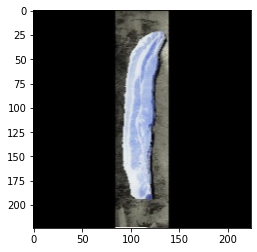

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(cv2.imread('/content/resized/class1/QC_pig_segmentation_1_000003.jpg'))

In [ ]:
# Folder to train test split

!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
splitfolders.ratio('resized', output='dataset', seed=77, ratio=(0.6, 0.2, 0.2))

Copying files: 1074 files [00:00, 7190.14 files/s]


In [ ]:
# pighighval 을 쓰려면 같이 resize 해서 저장했어야함

#folder_path = '/content/dataset/train'
folder_path = '/content/resized'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'class2': [], 'class1': [], 'class1+': []}

In [ ]:
label2index = {'class1+' : 0 , 'class1' : 1 ,'class2' : 2}

In [ ]:
x_train, y_train = [], []

for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
x_train, y_train

In [ ]:
folder_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles'

In [ ]:
y_train

In [ ]:
dataset.keys()

TypeError: ignored

In [ ]:
dataset.items()

In [ ]:
x_train

In [ ]:
y_train

[1, 0, 2]

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#x_train = x_train.astype('float32')

In [ ]:
x_train.shape, y_train.shape

((8521, 224, 224, 3), (8521,))

In [ ]:
import pickle

In [ ]:
with open(folder_path+'/'+'x_train.pickle', 'wb') as f:
    pickle.dump(x_train, f)

In [ ]:
with open(folder_path+'/'+'y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

In [ ]:
with open('x_train.pickle', 'rb') as x_train_pk:
    x_train = pickle.load(x_train_pk)


# 　　**여기서부터 진행**

---



In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
import pickle
#folder_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/'
#folder_path = '/content/MyDrive/MyDrive/'
#folder_path = '/content/drive/MyDrive/'
folder_path = '/content/drive/MyDrive/new pickle/'

with open(folder_path + 'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)
with open(folder_path + 'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open(folder_path + 'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open(folder_path + 'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8521, 224, 224, 3), (8521,), (1074, 224, 224, 3), (1074,))

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.astype('int8')
y_train.astype('int8')
x_test.astype('int8')
y_test.astype('int8')

array([1, 1, 1, ..., 2, 2, 2], dtype=int8)

## Trainset Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
folder_path

'/content/dataset/train'

In [ ]:
for label in  os.listdir(folder_path):
    label_path = folder_path + '/' + label + '/'
    for filename in os.listdir(label_path): 
        filepath = label_path + filename

        img = load_img(filepath)
        # img 출력
        # plt.imshow(img)
        # break
        x = img_to_array(img)
        # x.shape 출력
        # print(x.shape)
        # break
        x = x.reshape((1,) + x.shape)

        i = 0
        # flow : augmentation 함수
        for batch in datagen.flow(x, batch_size=1,
                                save_to_dir=label_path, save_prefix=label, save_format='jpg'):
            i += 1
            if i > 2:
                break  

                # flow 를 3 번 augmentation (3 장)

In [ ]:
folder_path = '/content/dataset/train'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'airplane': ['/content/dataset/train/airplane/airplane_0_4291.jpg',
  '/content/dataset/train/airplane/airplane_0_7306.jpg',
  '/content/dataset/train/airplane/airplane_0_6953.jpg',
  '/content/dataset/train/airplane/airplane_0395.jpg',
  '/content/dataset/train/airplane/airplane_0_6632.jpg',
  '/content/dataset/train/airplane/airplane_0_4017.jpg',
  '/content/dataset/train/airplane/airplane_0_9544.jpg',
  '/content/dataset/train/airplane/airplane_0_7549.jpg',
  '/content/dataset/train/airplane/airplane_0308.jpg',
  '/content/dataset/train/airplane/airplane_0_8842.jpg',
  '/content/dataset/train/airplane/airplane_0474.jpg',
  '/content/dataset/train/airplane/airplane_0_6353.jpg',
  '/content/dataset/train/airplane/airplane_0_4892.jpg',
  '/content/dataset/train/airplane/airplane_0_1275.jpg',
  '/content/dataset/train/airplane/airplane_0558.jpg',
  '/content/dataset/train/airplane/airplane_0_1563.jpg',
  '/content/dataset/train/airplane/airplane_0_833.jpg',
  '/content/dataset/train/ai

In [ ]:
label2index = {'airplane' : 0, 'car' : 1 , 'cat' : 2 , 'dog' : 3,
               'flower' : 4, 'fruit' : 5, 'motorbike' : 6, 'person' : 7}

In [ ]:
x_train, y_train = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = x_train.astype('float32')

In [ ]:
x_train.shape, y_train.shape

((15592, 224, 224, 3), (15592,))

## Load validataion data, test data

In [ ]:
folder_path = '/content/dataset/val'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

In [ ]:
x_val, y_val = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_val.append(image)
        y_val.append(label2index[label]) # label을 index로 변경

In [ ]:
x_val, y_val= np.array(x_val), np.array(y_val)

In [ ]:
#x_val = x_val.astype('float32')   # 지금은 float 은 별로 필요없음 (메모리를 많이차지함)
# 

In [ ]:
x_val.shape, y_val.shape

((213, 224, 224, 3), (213,))

In [ ]:
#folder_path = '/content/dataset/test'
folder_path = '/content/resized/test'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

In [ ]:
x_test, y_test = [], []   # 데이터에서 분리한 test 이미지, 라벨

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_test.append(image)
        y_test.append(label2index[label]) # label을 index로 변경

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
#x_test = x_test.astype('float32')

In [ ]:
import pickle

#folder_path = '/content/resized/'
folder_path = '/content/MyDrive/MyDrive/Colab Notebooks/datafiles/'

with open(folder_path+'x_test.pickle', 'wb') as f:
    pickle.dump(x_test, f)
with open(folder_path+'y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [ ]:
x_test.shape, y_test.shape

((1074, 224, 224, 3), (1074,))

## Zero Centering

In [ ]:
x_train

In [ ]:
np.mean(x_train, axis = 0)

In [ ]:
import numpy as np

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)   # 같은위치에 있는 픽셀들끼리 평균 (컬러는 RGB 별로 3 번)

In [ ]:
zero_mean_img = zero_mean(x_train)   # ex : fit

In [ ]:
#zero_mean_img = zero_mean_img.astype('int8') 메모리 문제로 int8 로 변환 (근사값으로 사용)
# float 은 int8 보다 더많은 공간을 필요
# 2^8 -128 ~ 127 까지 커버

In [ ]:
zero_mean_img.shape

(224, 224, 3)

In [ ]:
zero_mean_img = zero_mean_img.astype('uint8')

In [ ]:
zero_mean_img = zero_mean_img.astype('int8')

In [ ]:
zero_mean_img = zero_mean_img.astype('int16')

In [ ]:
x_train -= zero_mean_img   # ex : transform

In [ ]:
#x_val -= zero_mean_img
x_test -= zero_mean_img

In [ ]:
# x_train = x_train - zero_mean

# 같은위치에 있는 픽셀들끼리 평균 (컬러는 RGB 별로 3 번)

# 01 Deeplearning Basic Modeling

In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
# 기본 모델 = 완전연결계층 = Dense
model = tf.keras.Sequential([   # 리스트 안에 층별로 , kernel_initializer 초기값, glorot_uniform : 자비에 초기화
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),   # input
    #tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(3, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])   # 예측값 10 개 , 10 개의 확률값 (모두합치면 1)

# 맨위, 맨아래 는 수정불가 (데이터에 의해서 결정된것)
# 중간의 relu 는 핸들링가능 (그러나 로지스틱은 기울기소실), 맨끝의 softmax 는 지켜야함
# 일반적으로 줄어드는 구조, 같은크기인 경우도 많음
# sigmoid 는 잘안쓰고 기본적으로 relu (진보된것, 후에나온것이 좋긴함)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8521, 224, 224, 3), (8521,), (1074, 224, 224, 3), (1074,))

In [ ]:
x_train[0]

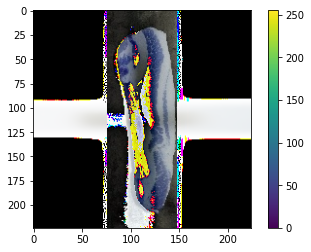

0

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()
y_test[0]

In [ ]:
'''
model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=10, 
          validation_data(x_test, y_test)) # '=' 을 뺐음;

In [ ]:
model.fit(x_train, y_train, epochs = 100, batch_size = 25,
         validation_data = (x_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose = 2)

print('\n테스트 정확도:', test_acc)

31/31 - 0s - loss: 1.7222 - accuracy: 0.4252 - 152ms/epoch - 5ms/step

테스트 정확도: 0.4251559376716614




---



# 02 CNN Basic Modeling

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 flatten_1 (Flatten)         (None, 692224)           

In [ ]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 학습
model.fit(x_train, y_train, epochs=3,validation_data=(x_test,  y_test))

Epoch 1/3
17/17 [==============================] - 71s 4s/step - loss: 404.2075 - accuracy: 0.3230 - val_loss: 1.4757 - val_accuracy: 0.0000e+00
Epoch 2/3
17/17 [==============================] - 69s 4s/step - loss: 1.2074 - accuracy: 0.3210 - val_loss: 1.2577 - val_accuracy: 0.0000e+00
Epoch 3/3
17/17 [==============================] - 69s 4s/step - loss: 1.1098 - accuracy: 0.4163 - val_loss: 1.3913 - val_accuracy: 0.0000e+00


In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

7/7 - 8s - loss: 1.1617 - accuracy: 0.2844 - 8s/epoch - 1s/step
0.2844036817550659


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit( x_train, y_train, epochs=100 )

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\n', test_acc)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 flatten_7 (Flatten)         (None, 692224)           

In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/MyDrive')

import pickle

#folder_path = '/content/MyDrive/MyDrive/'
folder_path = '/content/MyDrive/MyDrive/new pickle/'

with open(folder_path+'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)
with open(folder_path+'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open(folder_path+'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open(folder_path+'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

Mounted at /content/MyDrive


((8521, 224, 224, 3), (8521,), (1074, 224, 224, 3), (1074,))

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8635, 224, 224, 3), (8635,), (962, 224, 224, 3), (962,))

In [ ]:
#y_train[:-10:-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

# 　　**Transfer-Learning(ResNet)**

## 　　- 　**전체 재학습**



In [ ]:
import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [ ]:
dir(tf.keras.applications)

['DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'RegNetX002',
 'RegNetX004',
 'RegNetX006',
 'RegNetX008',
 'RegNetX016',
 'RegNetX032',
 'RegNetX040',
 'RegNetX064',
 'RegNetX080',
 'RegNetX120',
 'RegNetX160',
 'RegNetX320',
 'RegNetY002',
 'RegNetY004',
 'RegNetY006',
 'RegNetY008',
 'RegNetY016',
 'RegNetY032',
 'RegNetY040',
 'RegNetY064',
 'RegNetY080',
 'RegNetY120',
 'RegNetY160',
 'RegNetY320',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'ResNetRS101',
 'ResNetRS152',
 'ResNetRS200',
 'ResNetRS270',
 

In [ ]:
base_model = ResNet50(include_top = False, input_shape = (224, 224 ,3), weights = 'imagenet')
#base_model = ResNet50(include_top = False, input_shape = (224, 224 ,3), weights = None)   # 너무 오래걸림

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = True	  # 하위층 (bottleneck feature) 학습			

for layer in base_model.layers[:]:	
  print(layer.name, layer.trainable)

input_1 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_block1

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training = False)

x = tf.keras.layers.Flatten(input_shape = base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49,278,851
Trainable params: 49,225,731
Non-tra

In [ ]:
model.trainable

True

In [ ]:
model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), 
                   #batch_size= 32)
                   batch_size= 64)

Epoch 1/100
 51/135 [==========>...................] - ETA: 1:00:33 - loss: 1.3969 - accuracy: 0.3713

KeyboardInterrupt: ignored

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 5s 116ms/step - loss: 16.4437 - accuracy: 0.0000e+00


[16.44367790222168, 0.0]



---



In [ ]:
base_model = ResNet50(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
base_model.output_shape   # 1 by 1 , 2048 filters

(None, 7, 7, 2048)

In [ ]:
base_model.trainable = False

In [ ]:
'''
# sparse categorical crossentropy VS categorical crossentropy + one_hot 
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)
y_train.shape, y_test.shape

((8521, 3), (1074, 3))

In [ ]:
y_train[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)   # bottleneck feature
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)   # output to input 연결 , output shape 데이터개수 제외
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49,278,851
Trainable params: 25,691,139
Non-tra

In [ ]:
'''
# categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),   # 그냥 adam 은 learning_rate 를 수정불가 (영향이 많음, 중요한 파라미터)
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), batch_size=125)

NameError: ignored

# **전부 재학습**

---



In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.9.2


BaseException: ignored

In [ ]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

KeyError: ignored

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
base_model = ResNet50(include_top = False, input_shape = (224, 224 ,3), weights = 'imagenet')

In [ ]:
base_model.trainable = True				

for layer in base_model.layers[:]:	
  print(layer.name, layer.trainable)

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training = False)

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49,278,851
Trainable params: 49,225,731
Non-tra

In [ ]:
model.trainable

True

In [ ]:
y_train[0]

NameError: ignored

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8521, 224, 224, 3), (8521,), (1074, 224, 224, 3), (1074,))

In [ ]:
!pip install git+https://github.com/fchollet/stable-diffusion-tensorflow --upgrade --quiet
!pip install tensorflow_addons ftfy --quiet

     |████████████████████████████████| 1.1 MB 15.5 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for CPU/GPU or multi-GPU machines

def create_model(model):
    return tf.keras.Sequential(
        model = EfficientNetB0(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet'))
    
# use TPUStrategy scope to define model
with strategy.scope():
    model = create_model(EfficientNetB0)
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

# train model normally on a tf.data.Dataset
model.fit(x_train, y_train, epochs=50,batch_size=64,verbose=1)

TypeError: ignored

In [ ]:
#model.fit(x_train, y_train, epochs = 3, validation_data=(x_test, y_test), 
#                   batch_size= 125)

In [ ]:
print(now, end = '\n\n')

model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), 
                   batch_size = 64)

2022-11-30 11:46:33.452823

Epoch 1/100
 22/134 [===>..........................] - ETA: 1:19:28 - loss: 6.8799 - accuracy: 0.3402

KeyboardInterrupt: ignored

# **Fine Tune**

In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/MyDrive')

import pickle

#folder_path = '/content/MyDrive/MyDrive/'
folder_path = '/content/MyDrive/MyDrive/new pickle/'

with open(folder_path+'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)
with open(folder_path+'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open(folder_path+'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)
with open(folder_path+'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

Mounted at /content/MyDrive


((8521, 224, 224, 3), (8521,), (1074, 224, 224, 3), (1074,))

In [ ]:
#from tensorflow.keras.applications.Efficie import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0, efficientnet_v2

In [ ]:
## 일부 재학습 모델
#def create_model_2():
base_model = efficientnet_v2.EfficientNetV2S(include_top=False,input_shape=(224, 224, 3), weights = 'imagenet')			

base_model.trainable = True

for layer in base_model.layers[:-10]: 
    layer.trainable = False				

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
#x = tf.keras.layers.Dense(128, activation='mish')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

#return tf.keras.Model(inputs, outputs)
model = tf.keras.Model(inputs, outputs)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0, efficientnet_v2
#import tensorflow as tf

#strategy = tf.distribute.TPUStrategy(resolver)

#with strategy.scope():
#model = create_model_2()
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), 
                batch_size = 32)

Epoch 1/100
267/267 [==============================] - 671s 2s/step - loss: 1.1188 - accuracy: 0.4005 - val_loss: 1.0482 - val_accuracy: 0.4153
Epoch 2/100
267/267 [==============================] - 661s 2s/step - loss: 1.0202 - accuracy: 0.4630 - val_loss: 1.0114 - val_accuracy: 0.4777
Epoch 3/100
267/267 [==============================] - 657s 2s/step - loss: 0.9748 - accuracy: 0.5024 - val_loss: 0.9837 - val_accuracy: 0.4870
Epoch 4/100
267/267 [==============================] - 652s 2s/step - loss: 0.9178 - accuracy: 0.5415 - val_loss: 0.9549 - val_accuracy: 0.5326
Epoch 5/100
267/267 [==============================] - 665s 2s/step - loss: 0.8420 - accuracy: 0.5984 - val_loss: 0.9386 - val_accuracy: 0.5363
Epoch 6/100
267/267 [==============================] - 691s 3s/step - loss: 0.7648 - accuracy: 0.6410 - val_loss: 0.9308 - val_accuracy: 0.5363
Epoch 7/100
267/267 [==============================] - 684s 3s/step - loss: 0.6959 - accuracy: 0.6879 - val_loss: 0.8962 - val_accuracy:



---



In [ ]:
predict 는 evalute 값과 다르게 test image 뽑음
np.mean( model1, model2, axis = 0 )
argmax 
np.argmax(y_test, axis = 1) train 최대값 위치를 argmax 로 뽑고 test 원핫인코딩 최댓값 1 의 argmax(위치)가 동일한지

#binary 는 cast(0.5 를 기준으로 0,1로 바꿈)

In [ ]:
rm -f
os.remove()
os.rmdir
shutil.rmtree()

In [ ]:
print(3 * 9 * 222 * 222)
print(222 * 222)
print(220 * 220)

print(9 * 220 * 220 * 16)

(3 * 3 * 16) * 32
print(27 * 16)
144* 32

1330668
49284
48400
6969600
432


4608